## Домашняя работа №2

Реализовать и обучить (с нуля) СНС для задачи классификации изображений на датасете CIFAR-10.
Библиотеки: [Python, Tensorflow].

### Import modules

In [1]:
from silence_tensorflow import silence_tensorflow
silence_tensorflow()

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
tf.config.experimental.set_visible_devices([], 'GPU')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(tf.__version__)

2.1.0


### Download and prepare the CIFAR10 dataset

In [3]:
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

train_x, test_x = train_x / 255.0, test_x / 255.0

In [4]:
train_x.shape, test_x.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
train_y.shape, test_y.shape

((50000, 1), (10000, 1))

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

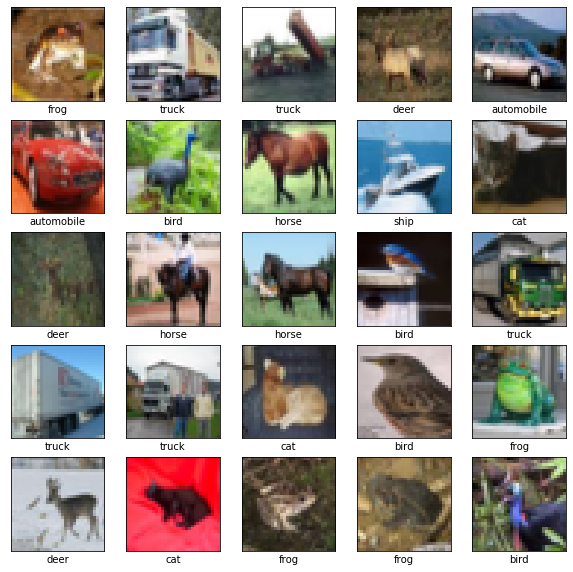

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_y[i][0]])
plt.show()

### Build CNN model

In [8]:
model = Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=[32, 32, 3]))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',  metrics=['sparse_categorical_accuracy'])

history = model.fit(train_x, train_y, epochs=10, validation_data=(test_x, test_y))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 378s 8ms/sample - loss: 1.3919 - sparse_categorical_accuracy: 0.5020 - val_loss: 1.1551 - val_sparse_categorical_accuracy: 0.5886
Epoch 2/10
50000/50000 [==============================] - 359s 7ms/sample - loss: 1.0854 - sparse_categorical_accuracy: 0.6154 - val_loss: 1.0421 - val_sparse_categorical_accuracy: 0.6337
Epoch 3/10
50000/50000 [==============================] - 358s 7ms/sample - loss: 0.9695 - sparse_categorical_accuracy: 0.6572 - val_loss: 0.9578 - val_sparse_categorical_accuracy: 0.6685
Epoch 4/10
50000/50000 [==============================] - 359s 7ms/sample - loss: 0.8833 - sparse_categorical_accuracy: 0.6894 - val_loss: 0.9248 - val_sparse_categorical_accuracy: 0.6786
Epoch 5/10
50000/50000 [==============================] - 358s 7ms/sample - loss: 0.8119 - sparse_categorical_accuracy: 0.7109 - val_loss: 0.8886 - val_sparse_categorical_accuracy: 0.6884
Epoch 6/10

### Visualization

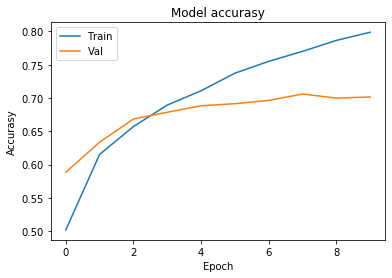

In [11]:
# accuracy

plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model accurasy')
plt.ylabel('Accurasy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

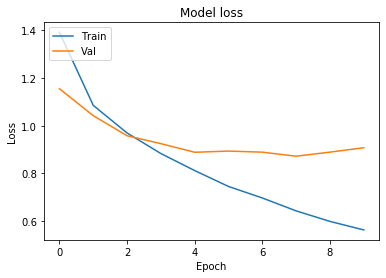

In [12]:
# loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [13]:
test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)

10000/10000 - 14s - loss: 0.9076 - sparse_categorical_accuracy: 0.7016


In [14]:
print(test_acc)

0.7016


### Prediction for random image

In [15]:
def test_item(sample):
    
    logits = model(sample[None, ...])[0]
    prediction = tf.nn.softmax(logits)
    ans = np.argmax(prediction)
    
    fig = plt.figure(figsize=(12,4))

    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(sample[:,:,0], cmap='gray')
    plt.xticks([]), plt.yticks([])

    ax = fig.add_subplot(1, 2, 2)
    bar_list = ax.bar(np.arange(10), prediction, align='center')
    bar_list[ans].set_color('g')
    ax.set_xticks(np.arange(10))
    ax.set_xlim([-1, 10])
    ax.grid(True)

    plt.show()
    
    print('Predicted: {}'.format(ans))

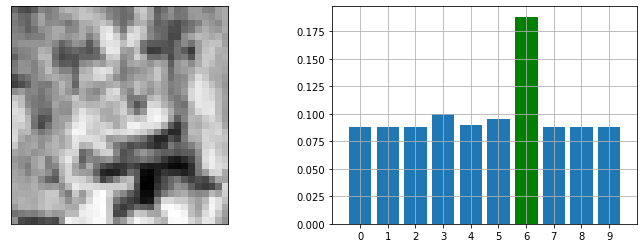

Predicted: 6
True Answer: [6]


In [16]:
import random
idx = random.randint(0, test_x.shape[0])
sample = test_x[idx, ...]
test_item(sample)

print('True Answer: {}'.format(test_y[idx]))